<a href="https://colab.research.google.com/github/amanzanares410/DS4002-Project1/blob/main/SCRIPTS/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis



This notebook extensively provides all of the code used to analyze the data provided in Amazon and Fashion Nova reviews. All dependencies and packages are listed and may be downloaded throughout the notebook.

In [24]:
!pip install ace-tools

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

amazon = pd.read_csv("https://raw.githubusercontent.com/amanzanares410/ds4002-project1/refs/heads/main/DATA/amazon_clothing_reviews.csv")
print(amazon.shape)
amazon.head()


(6525, 11)


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [26]:
fashion_nova = pd.read_csv('https://raw.githubusercontent.com/amanzanares410/DS4002-Project1/refs/heads/main/DATA/fashionnova_reviews.csv')
print(fashion_nova.shape)
fashion_nova.head()

(131980, 9)


,Reviewer Name,Profile Link,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience
0,Champagne,/users/66c78240087b6269ffbcb5fb,US,1 review,2024-08-22T20:24:02.000Z,Rated 5 out of 5 stars,I love ordering from fashion nova,I love ordering from fashion nova. The clothes...,"August 22, 2024"
1,Vg customer,/users/6618fdb53d4198001210cbe7,VG,3 reviews,2024-08-21T05:43:11.000Z,Rated 5 out of 5 stars,Top tier content for fashion nova,Always amazing clothes and the fast shipping i...,"August 18, 2024"
2,Colleen Burgher,/users/64e9595206be1a001244ff73,US,3 reviews,2024-08-21T17:09:14.000Z,Rated 5 out of 5 stars,Prices and quality of products are…,Prices and quality of products are GREAT Would...,"August 21, 2024"
3,R.G.M,/users/66c58ad1c6ab36352a08f57a,US,1 review,2024-08-21T08:36:03.000Z,Rated 5 out of 5 stars,Great customer service,Great customer service. I was helped until the...,"August 20, 2024"
4,Rosalyn Cousar,/users/60ad4b6ef3788e001adbb8e3,US,5 reviews,2024-08-22T00:46:16.000Z,Rated 3 out of 5 stars,False advertising,Disappointing experience. You don’t live up to...,"August 21, 2024"


In [27]:
# count NA (null) values in all relevant columns
print(sum(amazon['Review Text'].isna()))
print(sum(amazon['Title'].isna()))
print(sum(amazon['Rating'].isna()))

print(sum(fashion_nova['Review Text'].isna()))
print(sum(fashion_nova['Review Title'].isna()))
print(sum(fashion_nova['Rating'].isna()))

229
1068
0
0
48
0


In [28]:
# cleaning: drop if missing review text, convert rating into int
amazon = amazon.dropna(subset=['Review Text'])

rating_column = fashion_nova['Rating'].str.extract(r'Rated (\d) out of 5 stars').astype(int)
fashion_nova['Rating'] = rating_column

In [29]:
# sanity check to ensure there are no more missing values
print(sum(amazon['Review Text'].isna()))
print(sum(fashion_nova['Review Text'].isna()))

0
0


In [30]:
# will download all relevant packages required for the following cells to run
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [31]:
# defining stop words to remove insignificant words when tokenizing (splitting up) our review text
stop_words = set(stopwords.words('english'))
custom_stop_words = {}
stop_words.update(custom_stop_words)

def preprocess(text):
  tokens = word_tokenize(text.lower())
  tokens = [token for token in tokens if token.isalpha()]
  tokens = [token for token in tokens if token not in stop_words]
  return tokens

amazon['Processed_Reviews'] = amazon['Review Text'].apply(preprocess)
fashion_nova['Processed_Reviews'] = fashion_nova['Review Text'].apply(preprocess)


In [32]:
# searches all reviews for the keywords in the sets defined below to categorize reviews into those that mention shipping, quality, both, or neither
def categorize_review(text):
  shipping_keywords = ['shipping', 'delivery', 'shipment', 'deliver', 'time', 'packaging', 'box', 'late', 'early', 'fast', 'slow', 'arrived', 'delivered', 'received']
  quality_keywords = ['quality', 'fit', 'length', 'material', 'fabric', 'cheap', 'shape', 'style', 'clothing', 'made', 'size', 'thin']

  shipping = any(word in text for word in shipping_keywords)
  quality = any(word in text for word in quality_keywords)

  if shipping and quality:
    return 'Both'
  elif shipping:
    return 'Shipping'
  elif quality:
    return 'Quality'
  else:
    return 'Other'

amazon['Category'] = amazon['Processed_Reviews'].apply(categorize_review)
fashion_nova['Category'] = fashion_nova['Processed_Reviews'].apply(categorize_review)

In [33]:
# place the categorization metrics into a separate data frame
category_comparison = pd.DataFrame({
    'Amazon': amazon['Category'].value_counts(),
    'Fashion Nova': fashion_nova['Category'].value_counts()
}).fillna(0)


print(category_comparison)

          Amazon  Fashion Nova
Category                      
Both         481          6825
Other       1549         90651
Quality     4091         17017
Shipping     175         17487


In [34]:
# print numbers by percentage to gauge the number of reviews against the total
# this is because the Fashion Nova dataset is substantially larger than the Amazon (~132,000 observations vs ~6500)
category_percentage = category_comparison.div(category_comparison.sum(axis=0), axis=1) * 100
print(category_percentage)


             Amazon  Fashion Nova
Category                         
Both       7.639771      5.171238
Other     24.602922     68.685407
Quality   64.977764     12.893620
Shipping   2.779543     13.249735


In [35]:
# grabs the package VADER for sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [44]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# sentiment function that will assess the (preprocessed) review texts based on how positive, negative, or neutral it is
def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)  # returns a dictionary {neg, neu, pos, compound}
    compound = sentiment_score['compound']  # grabs compound score, which assesses how pos, neg, or neu a review is (from polarity_scores)
    if compound >= 0.05:
        return 'Good'
    elif compound <= -0.05:
        return 'Bad'
    else: # (-0.05, 0.05)
        return 'Neutral'

# apply to preprocessed reviews
amazon['Sentiment'] = amazon['Processed_Reviews'].apply(lambda tokens: get_sentiment(' '.join(tokens)))
fashion_nova['Sentiment'] = fashion_nova['Processed_Reviews'].apply(lambda tokens: get_sentiment(' '.join(tokens)))


In [45]:
# view the processed sentiment from the graphs
amazon[['Review Text', 'Sentiment', 'Category']].head()


,Review Text,Sentiment,Category
0,Absolutely wonderful - silky and sexy and comf...,Good,Other
1,Love this dress! it's sooo pretty. i happene...,Good,Quality
2,I had such high hopes for this dress and reall...,Good,Quality
3,"I love, love, love this jumpsuit. it's fun, fl...",Good,Shipping
4,This shirt is very flattering to all due to th...,Good,Quality


In [46]:
amazon_sentiment_counts = amazon.groupby(['Category', 'Sentiment']).size().reset_index(name='Count')
print("Amazon Review Sentiment Counts by Category:")
amazon_sentiment_counts

Amazon Review Sentiment Counts by Category:


,Category,Sentiment,Count
0,Both,Bad,23
1,Both,Good,453
2,Both,Neutral,5
3,Other,Bad,44
4,Other,Good,1473
5,Other,Neutral,32
6,Quality,Bad,78
7,Quality,Good,3980
8,Quality,Neutral,33
9,Shipping,Bad,5


In [47]:
fashion_nova_sentiment_counts = fashion_nova.groupby(['Category', 'Sentiment']).size().reset_index(name='Count')
print("Fashion Nova Review Sentiment Counts by Category:")
fashion_nova_sentiment_counts

Fashion Nova Review Sentiment Counts by Category:


,Category,Sentiment,Count
0,Both,Bad,854
1,Both,Good,5682
2,Both,Neutral,289
3,Other,Bad,3981
4,Other,Good,42190
5,Other,Neutral,44480
6,Quality,Bad,915
7,Quality,Good,15219
8,Quality,Neutral,883
9,Shipping,Bad,3085


In [48]:
# calculate percentage of each sentiment within each category
def calculate_percentage(df):
    total_by_category = df.groupby('Category').size().reset_index(name='Total')
    sentiment_counts = df.groupby(['Category', 'Sentiment']).size().reset_index(name='Count')
    merged = sentiment_counts.merge(total_by_category, on='Category')
    merged['Percentage'] = (merged['Count'] / merged['Total']) * 100
    return merged[['Category', 'Sentiment', 'Count', 'Total', 'Percentage']]

amazon_percentages = calculate_percentage(amazon)
fashion_nova_percentages = calculate_percentage(fashion_nova)

print("Amazon Review Sentiment Percentages by Category:")
print(amazon_percentages)

print("\nFashion Nova Review Sentiment Percentages by Category:")
print(fashion_nova_percentages)


Amazon Review Sentiment Percentages by Category:
    Category Sentiment  Count  Total  Percentage
0       Both       Bad     23    481    4.781705
1       Both      Good    453    481   94.178794
2       Both   Neutral      5    481    1.039501
3      Other       Bad     44   1549    2.840542
4      Other      Good   1473   1549   95.093609
5      Other   Neutral     32   1549    2.065849
6    Quality       Bad     78   4091    1.906624
7    Quality      Good   3980   4091   97.286727
8    Quality   Neutral     33   4091    0.806649
9   Shipping       Bad      5    175    2.857143
10  Shipping      Good    167    175   95.428571
11  Shipping   Neutral      3    175    1.714286

Fashion Nova Review Sentiment Percentages by Category:
    Category Sentiment  Count  Total  Percentage
0       Both       Bad    854   6825   12.512821
1       Both      Good   5682   6825   83.252747
2       Both   Neutral    289   6825    4.234432
3      Other       Bad   3981  90651    4.391568
4      Other 

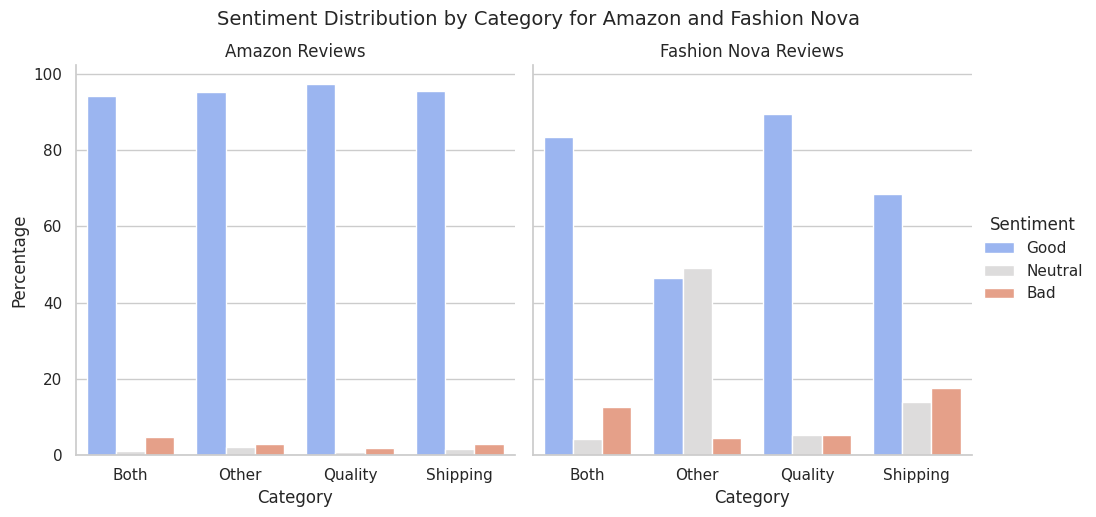

In [49]:
# distinguish between platforms
amazon_percentages['Platform'] = 'Amazon'
fashion_nova_percentages['Platform'] = 'Fashion Nova'

# combine both datasets
combined_percentages = pd.concat([amazon_percentages, fashion_nova_percentages], ignore_index=True, sort=False)

g = sns.catplot(data=combined_percentages, legend_out=True, x='Category', y='Percentage', hue='Sentiment',
                col='Platform', kind='bar', height=5, aspect=1, palette='coolwarm',
                hue_order=['Good', 'Neutral', 'Bad'])
g.set_axis_labels("Category", "Percentage")
g.set_titles("{col_name} Reviews")
g.fig.suptitle('Sentiment Distribution by Category for Amazon and Fashion Nova', y=1.03, fontsize=14)

plt.show()


<ipython-input-50-b2fb0aabaef8>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=category_df, x='Sentiment', y='Percentage', hue='Platform',


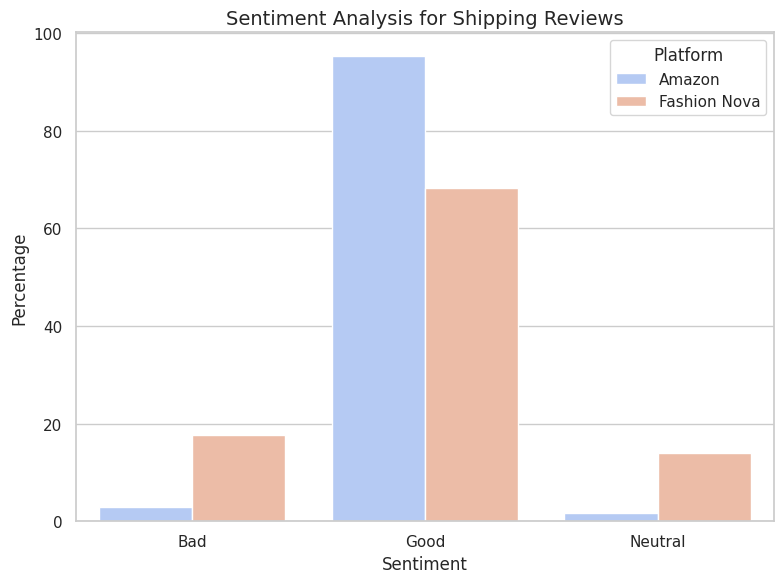

<ipython-input-50-b2fb0aabaef8>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=category_df, x='Sentiment', y='Percentage', hue='Platform',


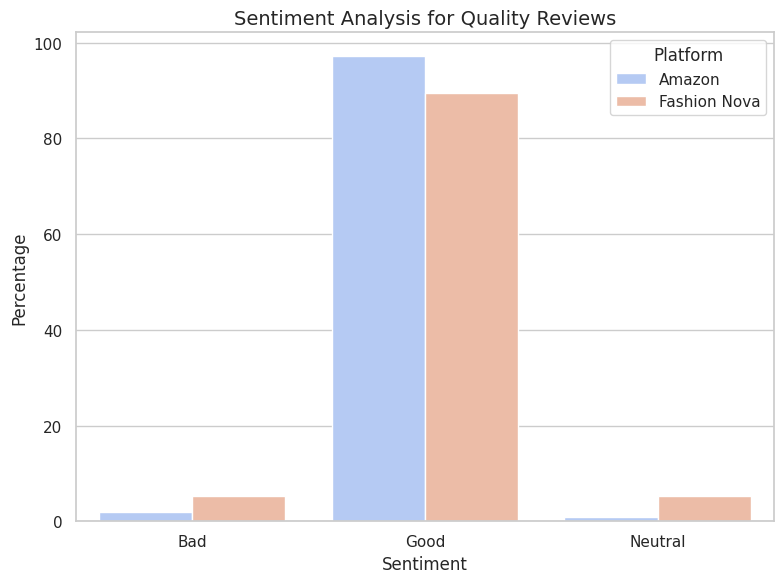

<ipython-input-50-b2fb0aabaef8>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=category_df, x='Sentiment', y='Percentage', hue='Platform',


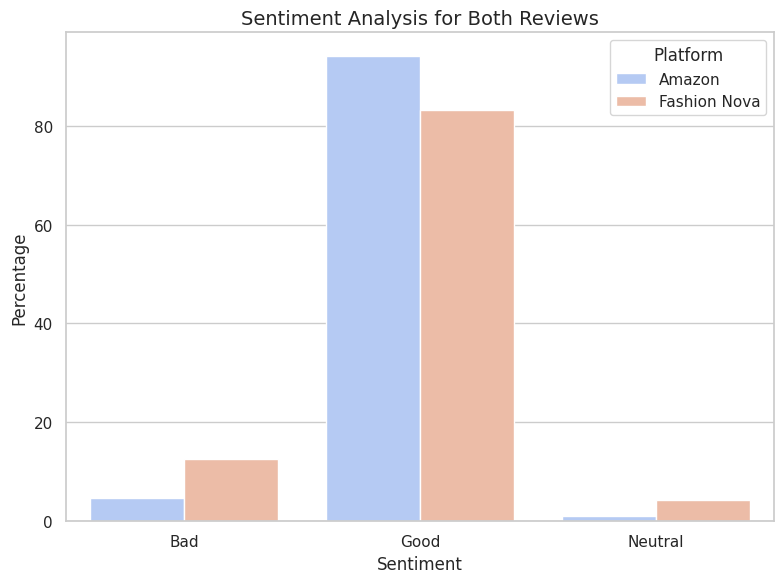

In [50]:
# plot data per type of review in category
def plot_category(category, df):
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")

    # filters through percentages
    category_df = df[df['Category'] == category]

    sns.barplot(data=category_df, x='Sentiment', y='Percentage', hue='Platform',
                ci=None, palette='coolwarm', dodge=True, hue_order=['Amazon', 'Fashion Nova'])

    plt.title(f'Sentiment Analysis for {category} Reviews', fontsize=14)
    plt.xlabel('Sentiment', fontsize=12)
    plt.ylabel('Percentage', fontsize=12)
    plt.legend(title='Platform')

    plt.tight_layout()
    plt.show()

# ignores "other" in category
plot_category('Shipping', combined_percentages)
plot_category('Quality', combined_percentages)
plot_category('Both', combined_percentages)


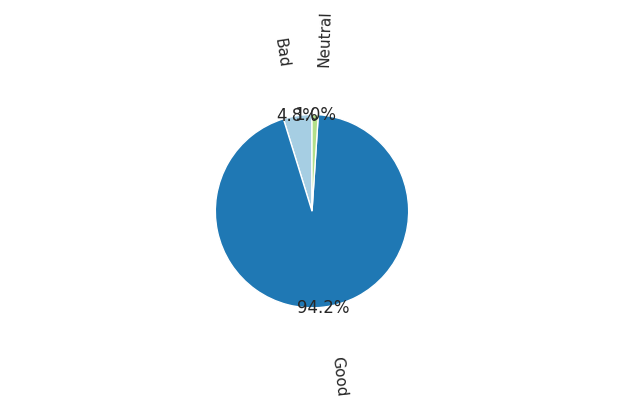

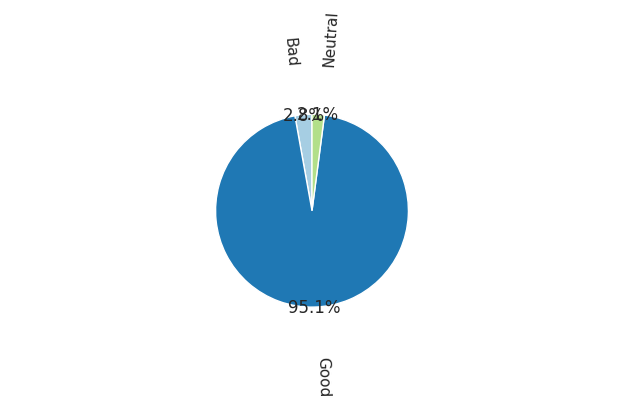

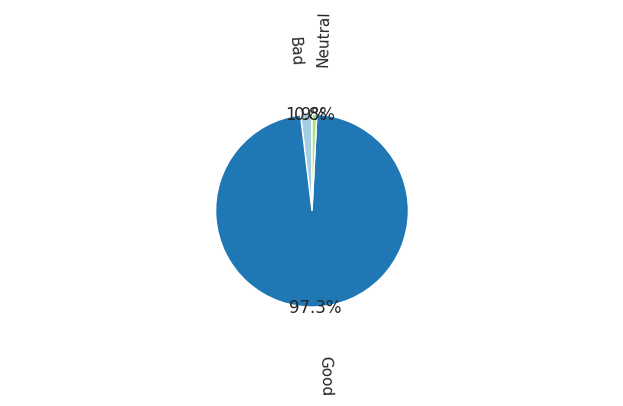

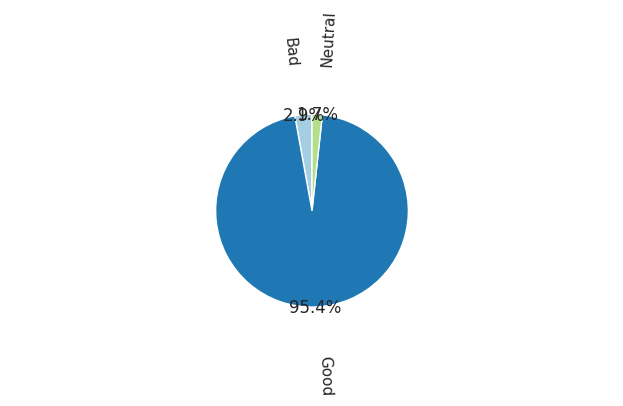

In [51]:
colors = sns.color_palette('Paired')
# attempt to plot pie charts, was done in Google Sheets because the proper padding to view the small percentages was not found
for category in fashion_nova_percentages['Category'].unique():
    category_data = amazon_percentages[fashion_nova_percentages['Category'] == category]
    sentiment_percentages = category_data.groupby('Sentiment')['Percentage'].sum()

    # plt.figure(figsize=(6, 6))
    plt.pie(sentiment_percentages, labels=sentiment_percentages.index, autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=1.0, labeldistance=1.5, rotatelabels=True)
    # plt.title(f'Fashion Nova Sentiment Distribution for {category} Category')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
